# Team name: Dimsum 
   - Member: Nguyễn Hoàng Huy - DS(3, 5)
## Problem: Chocolate Bar


![](https://img.newatlas.com/cocoa-tree-domestication-chocolate-1.jpg?auto=format%2Ccompress&ch=Width%2CDPR&fit=crop&h=347&q=60&rect=0%2C18%2C1620%2C911&w=616&s=2c0f902d21b734d77c99fd13171fb979)

### Context

- Nowadays, Chocolate is very popular in all over the world, with many types of chocolate for us to choose.Each year, residents of the United States collectively eat more than 2.8 billions pounds. However, not all chocolate bars are created equal! This dataset contains expert ratings of over 1,700 individual chocolate bars, along with information on their regional origin, percentage of cocoa, the variety of chocolate bean used and where the beans were grown.

- In this project we will look through the chocolate dataset, and analyze the data more deeply and extract insights.

- You can find the dataset, [here](https://www.kaggle.com/rtatman/chocolate-bar-ratings).

### Insights

- Some insights i will extract:
    - Where are the best cocoa beans grown?
    - Which countries produce the highest-rated bars?
    - What’s the relationship between cocoa solids percentage and rating?
    
    
### Flavors of Cacao Rating System:
- 5 = Elite (Transcending beyond the ordinary limits)
- 4 = Premium (Superior flavor development, character and style)
- 3 = Satisfactory(3.0) to praiseworthy(3.75) (well made with special qualities)
- 2 = Disappointing (Passable but contains at least one significant flaw)
- 1 = Unpleasant (mostly unpalatable)
    
   
### Data description¶
- **Company** (Ma Name of the company manufacturing the bar.
- **Specific Bean Origin or Bar Name** - The specific geo-region of origin for the bar.
- **REF** - Help us describe this column... What is it?
- **Review Date** - Date of publication of the review.
- **Cocoa Percent** - Cocoa percentage (darkness) of the chocolate bar being reviewed.
- **Company Location** - Manufacturer base country.
- **Rating** - Expert rating for the bar.
- **Bean Type** - The variety (breed) of bean used, if provided.
- **Broad Bean Origin** - The broad geo-region of origin for the bean.

## Explore data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
chocolate = pd.read_csv('chocolate.csv')
chocolate.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
chocolate.describe()

,REF,Review\nDate,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


## Cleaning Data

#### Cleaning headers

In [5]:
chocolate.head(1)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome


Column names are long, and not follow the standard type name, so we will rename it for later access and compute easily

In [6]:
chocolate.columns = chocolate.columns.str.lower()
chocolate.rename(columns={"company\xa0\n(maker-if known)" : "company_maker",
                          "specific bean origin\nor bar name" : "specific_bean",
                          "review\ndate" : "review_date",
                          "cocoa\npercent" : "cocoa_percent",
                          "company\nlocation" : "company_location",
                          "bean\ntype" : "bean_type",
                          "broad bean\norigin" : "broad_bean"}, inplace=True)

In [7]:
chocolate.head()

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
chocolate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company_maker       1795 non-null object
specific_bean       1795 non-null object
ref                 1795 non-null int64
review_date         1795 non-null int64
cocoa_percent       1795 non-null object
company_location    1795 non-null object
rating              1795 non-null float64
bean_type           1794 non-null object
broad_bean          1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


There are 1795 data points, but columns **bean_type** and **broad_bean** is missing one value, take a look

In [9]:
chocolate[chocolate["bean_type"].isna()]

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,70%,Canada,4.0,NaN,"Ven, Bolivia, D.R."


From poster of this dataset, column bean_type will have value **if provided**, so it is ok with **NaN** value

In [10]:
chocolate[chocolate["broad_bean"].isna()]

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean
1072,Mast Brothers,Madagascar,999,2012,72%,U.S.A.,2.5,Trinitario,NaN


In [11]:
#Replace Nan with their specific bean
chocolate['broad_bean'] = chocolate['broad_bean'].fillna(chocolate['specific_bean'])

#### Clean special characters

In [12]:
#remove % and parse "cocoa_percent" to float
chocolate["cocoa_percent"] = chocolate["cocoa_percent"].str.replace("%", "").astype(float)

In [20]:
#Take a look at broad_bean column
chocolate[chocolate["broad_bean"].str.len()==1]

,company_maker,specific_bean,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean


In [19]:
chocolate["bean_type"].unique()

array([nan, 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [14]:
empty = chocolate.bean_type[0]

def convert_to_nan(l):
    if l == empty:
        return np.nan
    else:
        return l

for col in chocolate.columns:
    if chocolate[col].dtype == 'O':
        chocolate[col] = chocolate[col].apply(lambda l: convert_to_nan(l))

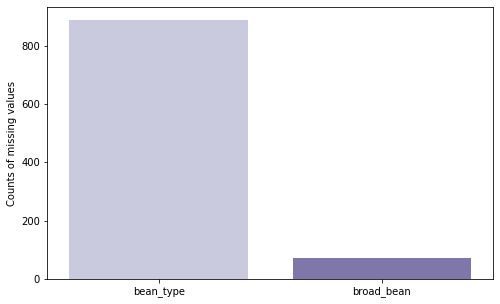

In [15]:
missing = chocolate.isnull().sum()
missing = missing[missing > 0]

plt.figure(figsize=(8,5))
sns.barplot(x=missing.index, y=missing.values, palette="Purples")
plt.ylabel("Counts of missing values");

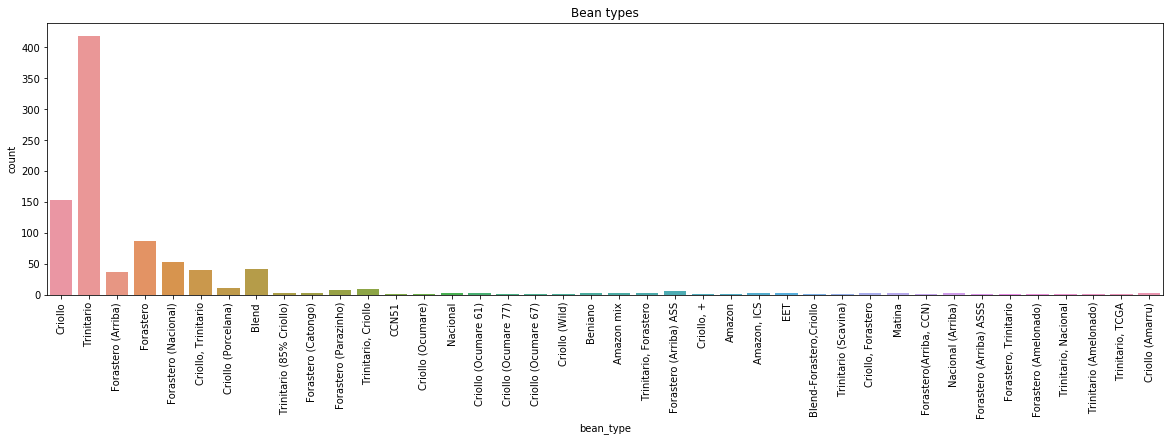

In [16]:
plt.figure(figsize=(20,5))
sns.countplot(chocolate.bean_type)
plt.xticks(rotation=90);
plt.title("Bean types");

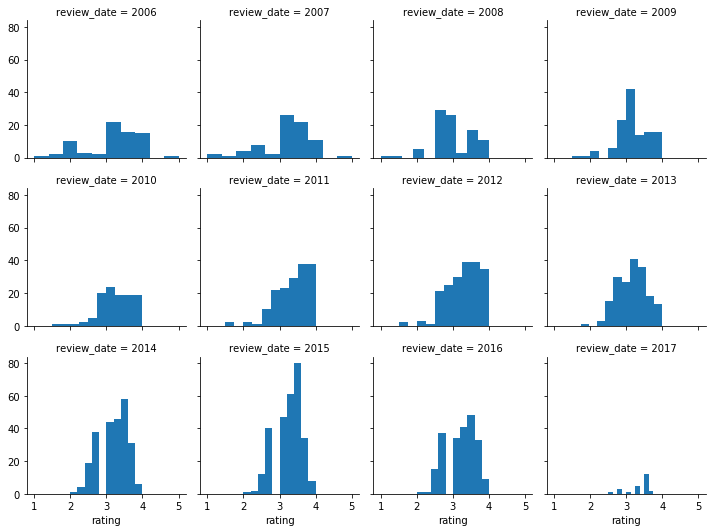

In [17]:
g = sns.FacetGrid(chocolate, col = 'review_date', col_wrap=4, height=2.5)
g = g.map(plt.hist, "rating")